In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import scipy.stats as stats
import missingno as msno


# Optional: used to avoid blurry output plots in Jupyter Notebooks
%config InlineBackend.figure_format = 'retina' 

In [2]:
my_folder = "/Users/Andy/Desktop/Documents/GitHub/project-adsml-ibex-c2-s10-5121-3258"
file_loc = my_folder+"/data_385k.pkl"

In [3]:
df_openfood = pd.read_pickle('data_385k.pkl', compression='zip')

## **D. Text Data**

In [4]:
# Load English stopwords from nltk

import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

import re

**In this task, you will work with the ```ingredients_en``` column; your goal is to preprocess the text data in this column and answer the following questions :**

1. **Which product has the longest ingredients list?**
2. **Which products have the shortest ingredients list?**
3. **Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings**

#### **Preprocessing the data**

In [5]:
pd.set_option('display.max_colwidth', 500)

In [6]:
df_openfood.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Missing Values**

- We are checking if there missing values in the ```ingredients_en``` column :

In [7]:
df_openfood["ingredients_en"].isna().sum()

49083

- We decide to remove the rows that have no values (NaN) in the ```ingredients_en```column :

In [8]:
df_openfood_ingredients = df_openfood.dropna(axis = "rows", subset = ["ingredients_en"])

In [9]:
df_openfood_ingredients["ingredients_en"].isna().sum()

0

**Duplicates**

- We check if there are duplicates rows

In [10]:
print('Found {} duplicated entries.'.format(df_openfood_ingredients.duplicated(subset = ["ingredients_en"]).
                                            sum()))

Found 89074 duplicated entries.


In [11]:
# Drop duplicates
df_openfood_ingredients = df_openfood_ingredients.drop_duplicates(subset = ["ingredients_en"])
df_openfood_ingredients.shape

(247227, 99)

#### **1. Which product has the longest ingredients list ?**

**Clean the texts**

- We define a function that will remove punctions, hyphens, etc, in our texts :

In [12]:
def preprocess_text(text):
    
    clean_text = text.lower()
    clean_text = re.sub(r"[,.()\[\]]"," ", clean_text) # sub punctuation with whitespace
    clean_text = re.sub(r"\s-\s"," ", clean_text) # sub single hyphens with whitespace
    clean_text = re.sub("fd&c", " ", clean_text)
    clean_text = re.sub("/", r" ", clean_text)
    clean_text = re.sub(":", r" ", clean_text)
    clean_text = re.sub("[*]", r" ", clean_text)


    processed_sample_tokens = [tok for tok in clean_text.split() if tok not in stopwords_english]
    
    return processed_sample_tokens

- First, we apply the function we created above to our column ```ingredients_en```, then we count the length of each of the ingredients lists we have in our column and finally we sort our result (longest to shortest ingredients list). In this way, we can get the index of the product with the longest ingredients list:

In [13]:
df_openfood_ingredients["ingredients_en"].apply(lambda x: len(preprocess_text(x))).sort_values(
    ascending = False)

51629     470
350670    449
275300    444
241595    427
121099    413
         ... 
93743       1
41314       1
9885        1
52229       1
147899      1
Name: ingredients_en, Length: 247227, dtype: int64

- We locate the ```product_name_en``` that corresponds to the index of the <u>longest</u> ingredients list :

In [14]:
print(df_openfood_ingredients["product_name_en"].loc[51629])

Gamesa Lonchera Assorted Cookies 14.3 Ounce 5 Pack Box


#### **2. Which products have the shortest ingredients list ?**

- We use the same logic as in the previous point (1), but this time we look for the top 20 products with the <u>shortest</u> ingredients list :

In [15]:
df_openfood_ingredients["ingredients_en"].apply(lambda x: len(preprocess_text(x))).sort_values(ascending = False).tail(
    20).index.values

array([269965,   9872, 151122,  52187,   9877,  94223, 129270,  63389,
        41379, 129280, 175135,   9880,   9881,   9882,   9883,  93743,
        41314,   9885,  52229, 147899])

In [16]:
pd.set_option('display.max_columns', 100)
df_openfood_ingredients.loc[[269965, 9872, 151122,  52187, 9877, 94223, 129270, 63389, 41379, 129280, 175135, 9880, 
                             9881, 9882, 9883, 93743,41314, 9885, 52229, 147899]].set_index("product_name_en")

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,id,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,product_name_de,product_name_fr,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
product_name_en,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WILD CAUGHT LARGE SARDINES,0.0,0857762003325,200.0,mg,1.00,NaN,g,37.0,mg,NaN,NaN,US,2021-04-26T10:21:46.630Z,187.0,NaN,kCal,782.41,NaN,kJ,11.00,NaN,g,5.00,g,0.0,g,NaN,NaN,0.0,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,271756,SARDINE,1.80,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,NaN,NaN,21.00,NaN,g,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,g,NaN,NaN,0.00,NaN,g,g,2021-04-26T10:21:46.630Z,100.0,IU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Migros Bio Almonds,0.0,7613312022771,NaN,NaN,9.00,2.5,g,NaN,NaN,NaN,NaN,CH,2016-09-12T17:18:32.971Z,585.0,176.0,kCal,2420.00,730.0,kJ,49.00,15.0,g,NaN,NaN,NaN,NaN,NaN,NaN,12.0,3.5,NaN,NaN,g,NaN,NaN,NaN,NaN,g,10895,Almonds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,g,NaN,NaN,Migros Bio Mandelkerne,Migros Bio Amandes,21.00,6.0,g,200.0,0.10,0.1,g,3.5,1.0,g,NaN,NaN,NaN,NaN,NaN,4.00,1.0,g,g,2019-10-30T10:52:30.456Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWAI NUGGETS,0.0,0665072011578,0.0,mg,0.00,NaN,g,40.0,mg,NaN,NaN,US,2021-04-26T10:20:34.900Z,62.0,NaN,kCal,259.41,NaN,kJ,1.77,NaN,g,0.88,g,0.0,g,NaN,NaN,0.0,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,152902,SWAI .,0.00,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,NaN,NaN,13.27,NaN,g,113.0,NaN,NaN,NaN,NaN,NaN,NaN,0.26,NaN,g,NaN,NaN,0.00,NaN,g,g,2021-04-26T10:20:34.900Z,0.0,IU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,mg,NaN,NaN,NaN,NaN
LAMB BONE-IN LAMB LEGS,0.0,90075391000475,11.0,mg,0.00,NaN,g,67.0,mg,NaN,NaN,US,2021-04-26T10:19:02.051Z,NaN,NaN,NaN,NaN,NaN,NaN,4.46,NaN,g,1.34,g,0.0,g,NaN,NaN,0.0,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,53951,Lamb,1.65,mg,NaN,NaN,NaN,NaN,0.00,g,NaN,NaN,0.0,g,0.0,g,348.0,mg,NaN,NaN,21.43,NaN,g,112.0,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,g,NaN,NaN,0.00,NaN,g,g,2021-04-26T10:1

In [17]:
# First time results. It differs from the results above, but it is also valid.

df_openfood_ingredients.loc[[70077, 172684, 172757, 323812, 129280, 129270, 212527, 42343, 69863, 70982]].set_index("product_name_en")

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,id,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,product_name_de,product_name_fr,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
product_name_en,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"AMAZONAS RAINFOREST PRODUCT, ANDEAN QUINOA",0.0,0742987121964,50.0,mg,62.50,NaN,g,0.0,mg,NaN,NaN,US,2021-04-26T10:19:22.274Z,350.0,NaN,kCal,1464.40,NaN,kJ,7.25,NaN,g,0.0,g,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,71844,QUINUA.,4.50,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,NaN,NaN,12.50,NaN,g,40.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,g,NaN,NaN,0.00,NaN,g,g,2021-04-26T10:19:22.274Z,0.0,IU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,mg,NaN,NaN,NaN,NaN
BHAKRI FLOUR,0.0,0011433158725,0.0,mg,78.26,NaN,g,0.0,mg,NaN,NaN,US,2021-04-26T10:20:46.677Z,380.0,NaN,kCal,1589.92,NaN,kJ,2.17,NaN,g,0.0,g,0.0,g,NaN,NaN,2.2,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,174464,WHEAT.,3.91,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,NaN,NaN,10.87,NaN,g,46.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,g,NaN,NaN,0.00,NaN,g,g,2021-04-26T10:20:46.677Z,0.0,IU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,mg,NaN,NaN,NaN,NaN
BLUEBERRIES,0.0,0015400171779,29.0,mg,15.71,NaN,g,0.0,mg,NaN,NaN,US,2021-04-26T10:20:46.677Z,64.0,NaN,kCal,267.78,NaN,kJ,0.00,NaN,g,0.0,g,0.0,g,NaN,NaN,5.0,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,174537,BLACKBERRIES,0.77,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,NaN,NaN,1.43,NaN,g,140.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,g,NaN,NaN,10.71,NaN,g,g,2021-04-26T10:20:46.677Z,143.0,IU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,mg,NaN,NaN,NaN,NaN
ORGANIC GOLDENBERRIES,0.0,0812986010337,32.0,mg,85.71,NaN,g,0.0,mg,NaN,NaN,US,2021-04-26T10:22:16.766Z,321.0,NaN,kCal,1343.06,NaN,kJ,5.36,NaN,g,0.0,g,0.0,g,NaN,NaN,21.4,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,325608,GOLDENBERRIES*.,3.57,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,NaN,NaN,7.14,NaN,g,28.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,g,NaN,NaN,42.86,NaN,g,g,2021-04-26T10:22:16.766Z,NaN,Na

#### **3. Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings**

In [18]:
# Import "Counter" that is useful to count the tokens

from collections import Counter

- We first clean the ingredients lists, as we did previously, but  we keep the results in a new object that we will use in the rest of the exercise :

In [19]:
df_ingredients_clean = df_openfood_ingredients["ingredients_en"].apply(lambda x: preprocess_text(x))

In [20]:
# Just to have a quick look of our new object

df_ingredients_clean.head() 

0                                                                                                                                                                                                                      [superior, quality, durum, wheat, pasta, ingredients, durum, wheat, water, agricultural, ingredients, products, organic, farming]
1                                                                                                                                                                                                                                                                                                                [bio, milk, switzerland, kitchen, salt]
2                                                                                                                                                                                                                                                                                                                     

In [21]:
type(df_ingredients_clean)

pandas.core.series.Series

- Now, we have to count the occurences of the ingredients in all our products :

Let's try to extract the most frequent words, but only in the ingredients' list of one product, as a test :

In [22]:
# Print top-25 most frequent tokens in df_ingredients_clean for just one product (as a test)
Counter(df_ingredients_clean[51629]).most_common(25)

[('oil', 28),
 ('sodium', 19),
 ('contains', 15),
 ('corn', 12),
 ('flour', 11),
 ('soy', 11),
 ('bicarbonate', 10),
 ('wheat', 9),
 ('palm', 8),
 ('tbhq', 8),
 ('acid', 7),
 ('syrup', 7),
 ('aluminum', 7),
 ('sulfate', 7),
 ('yellow', 7),
 ('coconut', 6),
 ('milk', 6),
 ('enriched', 5),
 ('niacinamide', 5),
 ('ferrous', 5),
 ('fumarate', 5),
 ('thiamin', 5),
 ('mononitrate', 5),
 ('riboflavin', 5),
 ('folic', 5)]

In [23]:
# Concatenate all strings in one array
# Here it is just a try to see how it works

np.concatenate(df_ingredients_clean.sample(frac=0.01).values)

array(['organic', 'brown', 'rice', ..., 'vegetable', 'annatto', 'color'],
      dtype='<U22')

Here we count all the occurences of the ingredients in all our products and extract the top 25 : 

In [24]:
Counter(np.concatenate(df_ingredients_clean.values)).most_common(25)

[('salt', 307192),
 ('sugar', 226819),
 ('oil', 220836),
 ('acid', 208138),
 ('water', 179712),
 ('flour', 176509),
 ('milk', 162536),
 ('corn', 152676),
 ('natural', 150401),
 ('organic', 147226),
 ('sodium', 135044),
 ('wheat', 130516),
 ('flavor', 114685),
 ('powder', 105833),
 ('gum', 97556),
 ('soy', 94050),
 ('syrup', 92746),
 ('starch', 91805),
 ('citric', 80331),
 ('cheese', 78187),
 ('color', 76473),
 ('garlic', 71261),
 ('vitamin', 68753),
 ('lecithin', 68111),
 ('juice', 65818)]

**Plot Most Common Words**

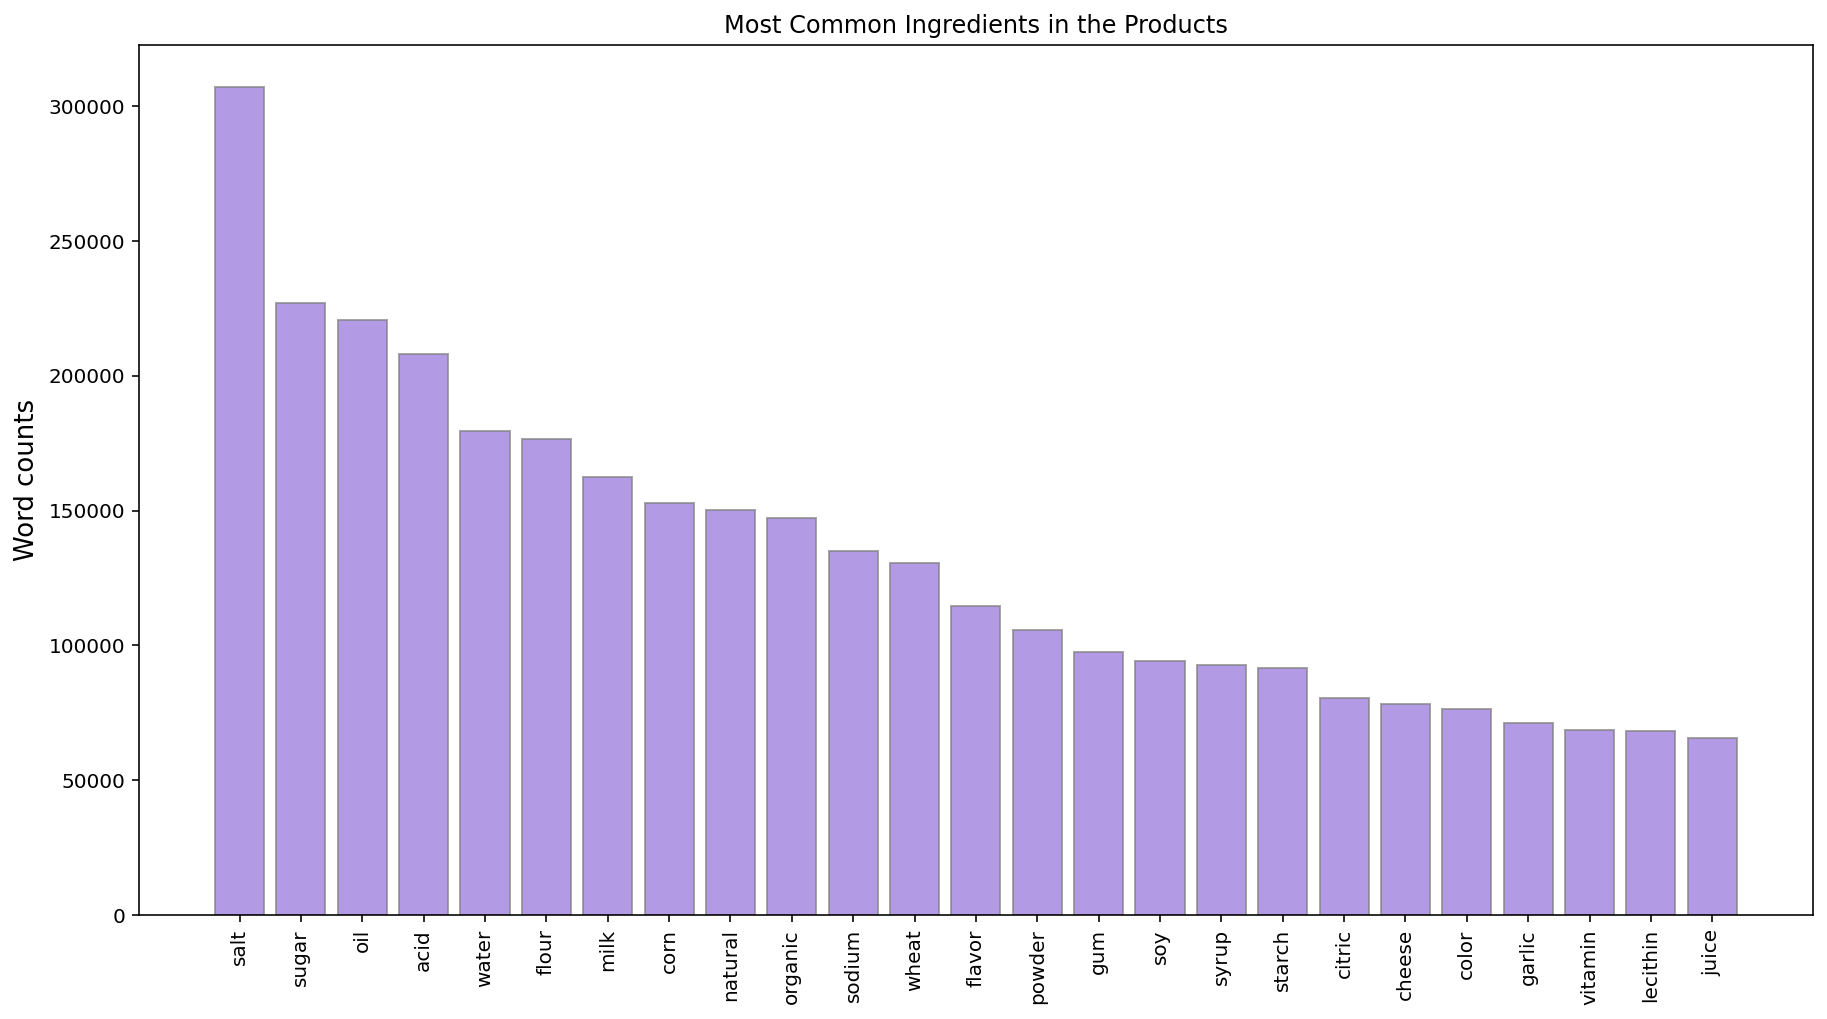

In [25]:
import random

# Generates a random integer between 0 and len(df)
idx = random.randint(0,len(df_ingredients_clean))

# Find top-50 most common words
w = Counter(np.concatenate(df_ingredients_clean.values)).most_common(25)

# Plots top words

# Barplot and font specifications
barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 15, "fontweight": "bold", "y": 1.2}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,8))
plt.bar(*zip(*w), **barplot_specs)
plt.title("Most Common Ingredients in the Products")
plt.ylabel('Word counts', **label_specs)
plt.xticks(rotation=90)
plt.show()

## **E. Time-series data**

In [26]:
# Load English stopwords from nltk

import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

import re

#### **1. Your task is to investigate the total number of items created each month at each hour. You should use the ```created_at``` column to draw a heatmap with the hours (0 to 23) on the ```x-axis``` and the months (1 to 12) on the ```y-axis```. The color of the heatmap should show the number of items created at each month-hour pair.**

- We first look at what our ```created_at``` variable looks like and what is its type : 

In [27]:
pd.set_option('max_columns', 50)
df_openfood["created_at"].head()

0    2016-06-01T11:42:22.908Z
1    2016-06-01T11:42:25.111Z
2    2016-06-01T11:42:25.900Z
3    2016-06-01T11:42:26.184Z
4    2016-06-01T11:42:26.350Z
Name: created_at, dtype: object

In [28]:
type(df_openfood.created_at)

pandas.core.series.Series

In [29]:
df_openfood.created_at.dtypes

dtype('O')

- As our variable ```created_at``` is not registered as a time variable, we modify it :

In [30]:
df_openfood["created_at"] = pd.to_datetime(df_openfood["created_at"], infer_datetime_format=True) 
df_openfood["created_at"].dtype

datetime64[ns, UTC]

In [31]:
openfood_datetime = df_openfood[["created_at"]]

In [32]:
openfood_datetime

,created_at
0,2016-06-01 11:42:22.908000+00:00
1,2016-06-01 11:42:25.111000+00:00
2,2016-06-01 11:42:25.900000+00:00
3,2016-06-01 11:42:26.184000+00:00
4,2016-06-01 11:42:26.350000+00:00
...,...
385379,2021-10-04 14:08:42.215000+00:00
385380,2021-10-04 14:12:06.476000+00:00
385381,2021-10-04 14:22:10.685000+00:00
385382,2021-10-04 14:27:36.157000+00:00


- For our exercise, to create a heatmap, we need to extract the hour and month values :

In [33]:
openfood_datetime.loc[:, "created_at"].dt.hour

0         11
1         11
2         11
3         11
4         11
          ..
385379    14
385380    14
385381    14
385382    14
385383    16
Name: created_at, Length: 385384, dtype: int64

In [34]:
openfood_datetime["hour"] = openfood_datetime.loc[:, "created_at"].dt.hour

/var/folders/4p/2qnqc9ns7mj7j2vt_7f360qh0000gn/T/ipykernel_12279/1537195038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openfood_datetime["hour"] = openfood_datetime.loc[:, "created_at"].dt.hour


In [35]:
openfood_datetime["month"] = openfood_datetime.loc[:, "created_at"].dt.month

/var/folders/4p/2qnqc9ns7mj7j2vt_7f360qh0000gn/T/ipykernel_12279/4235416726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openfood_datetime["month"] = openfood_datetime.loc[:, "created_at"].dt.month


In [36]:
openfood_datetime.head()

,created_at,hour,month
0,2016-06-01 11:42:22.908000+00:00,11,6
1,2016-06-01 11:42:25.111000+00:00,11,6
2,2016-06-01 11:42:25.900000+00:00,11,6
3,2016-06-01 11:42:26.184000+00:00,11,6
4,2016-06-01 11:42:26.350000+00:00,11,6


- We have all the values we need for our heatmap. We now have to put in the right shape in order to use it.

In [37]:
openfood_datetime

,created_at,hour,month
0,2016-06-01 11:42:22.908000+00:00,11,6
1,2016-06-01 11:42:25.111000+00:00,11,6
2,2016-06-01 11:42:25.900000+00:00,11,6
3,2016-06-01 11:42:26.184000+00:00,11,6
4,2016-06-01 11:42:26.350000+00:00,11,6
...,...,...,...
385379,2021-10-04 14:08:42.215000+00:00,14,10
385380,2021-10-04 14:12:06.476000+00:00,14,10
385381,2021-10-04 14:22:10.685000+00:00,14,10
385382,2021-10-04 14:27:36.157000+00:00,14,10


- We check the NaN values :

In [38]:
openfood_datetime.isna().sum()

created_at    0
hour          0
month         0
dtype: int64

- We just test what the ```size()``` function gives :

In [39]:
openfood_datetime.groupby(["month", "hour"]).size()

month  hour
1      6         3
       7        60
       8       164
       9       264
       10      195
              ... 
12     17       34
       18        8
       19        6
       20       22
       21       25
Length: 221, dtype: int64

In [40]:
created_heatmap = openfood_datetime.groupby(["month", "hour"]).size().reset_index(name="count_created")
created_heatmap

,month,hour,count_created
0,1,6,3
1,1,7,60
2,1,8,164
3,1,9,264
4,1,10,195
...,...,...,...
216,12,17,34
217,12,18,8
218,12,19,6
219,12,20,22


In [41]:
created_heatmap = created_heatmap.pivot("month", "hour", "count_created")
created_heatmap

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,60.0,164.0,264.0,195.0,21.0,146.0,154.0,89.0,57.0,16.0,32.0,38.0,13.0,16.0,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,251.0,174.0,113.0,238.0,301.0,286.0,73.0,45.0,11.0,12.0,3.0,51.0,16.0,99.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,56.0,406.0,332.0,286.0,860.0,274.0,184.0,542.0,549.0,119.0,90.0,12.0,31.0,496.0,13.0,NaN,1.0
4,NaN,8.0,NaN,NaN,16.0,105.0,378.0,261.0,257.0,264.0,328234.0,136.0,180.0,184.0,173.0,39.0,22.0,28.0,6.0,213.0,24.0,186.0,NaN,NaN
5,NaN,NaN,2.0,NaN,1.0,NaN,21.0,148.0,166.0,91.0,70.0,113.0,238.0,107.0,98.0,58.0,19.0,170.0,67.0,25.0,NaN,NaN,NaN,NaN
6,4.0,NaN,18.0,NaN,NaN,1.0,244.0,154.0,152.0,190.0,50.0,92.0,449.0,840.0,353.0,162.0,195.0,605.0,211.0,9.0,22.0,49.0,743.0,44.0
7,397.0,95.0,NaN,NaN,NaN,1.0,1164.0,204.0,115.0,115.0,298.0,288.0,148.0,184.0,122.0,174.0,1052.0,394.0,311.0,498.0,1561.0,509.0,427.0,521.0
8,19.0,14.0,10.0,3.0,NaN,10.0,41.0,334.0,132.0,414.0,1177.0,1163.0,257.0,352.0,153.0,140.0,249.0,145.0,125.0,244.0,106.0,52.0,33.0,5.0
9,NaN,NaN,NaN,1.0,5.0,295.0,532.0,297.0,1038.0,641.0,1093.0,877.0,1070.0,1812.0,309.0,384.0,1440.0,2366.0,2460.0,1692.0,262.0,370.0,1.0,NaN


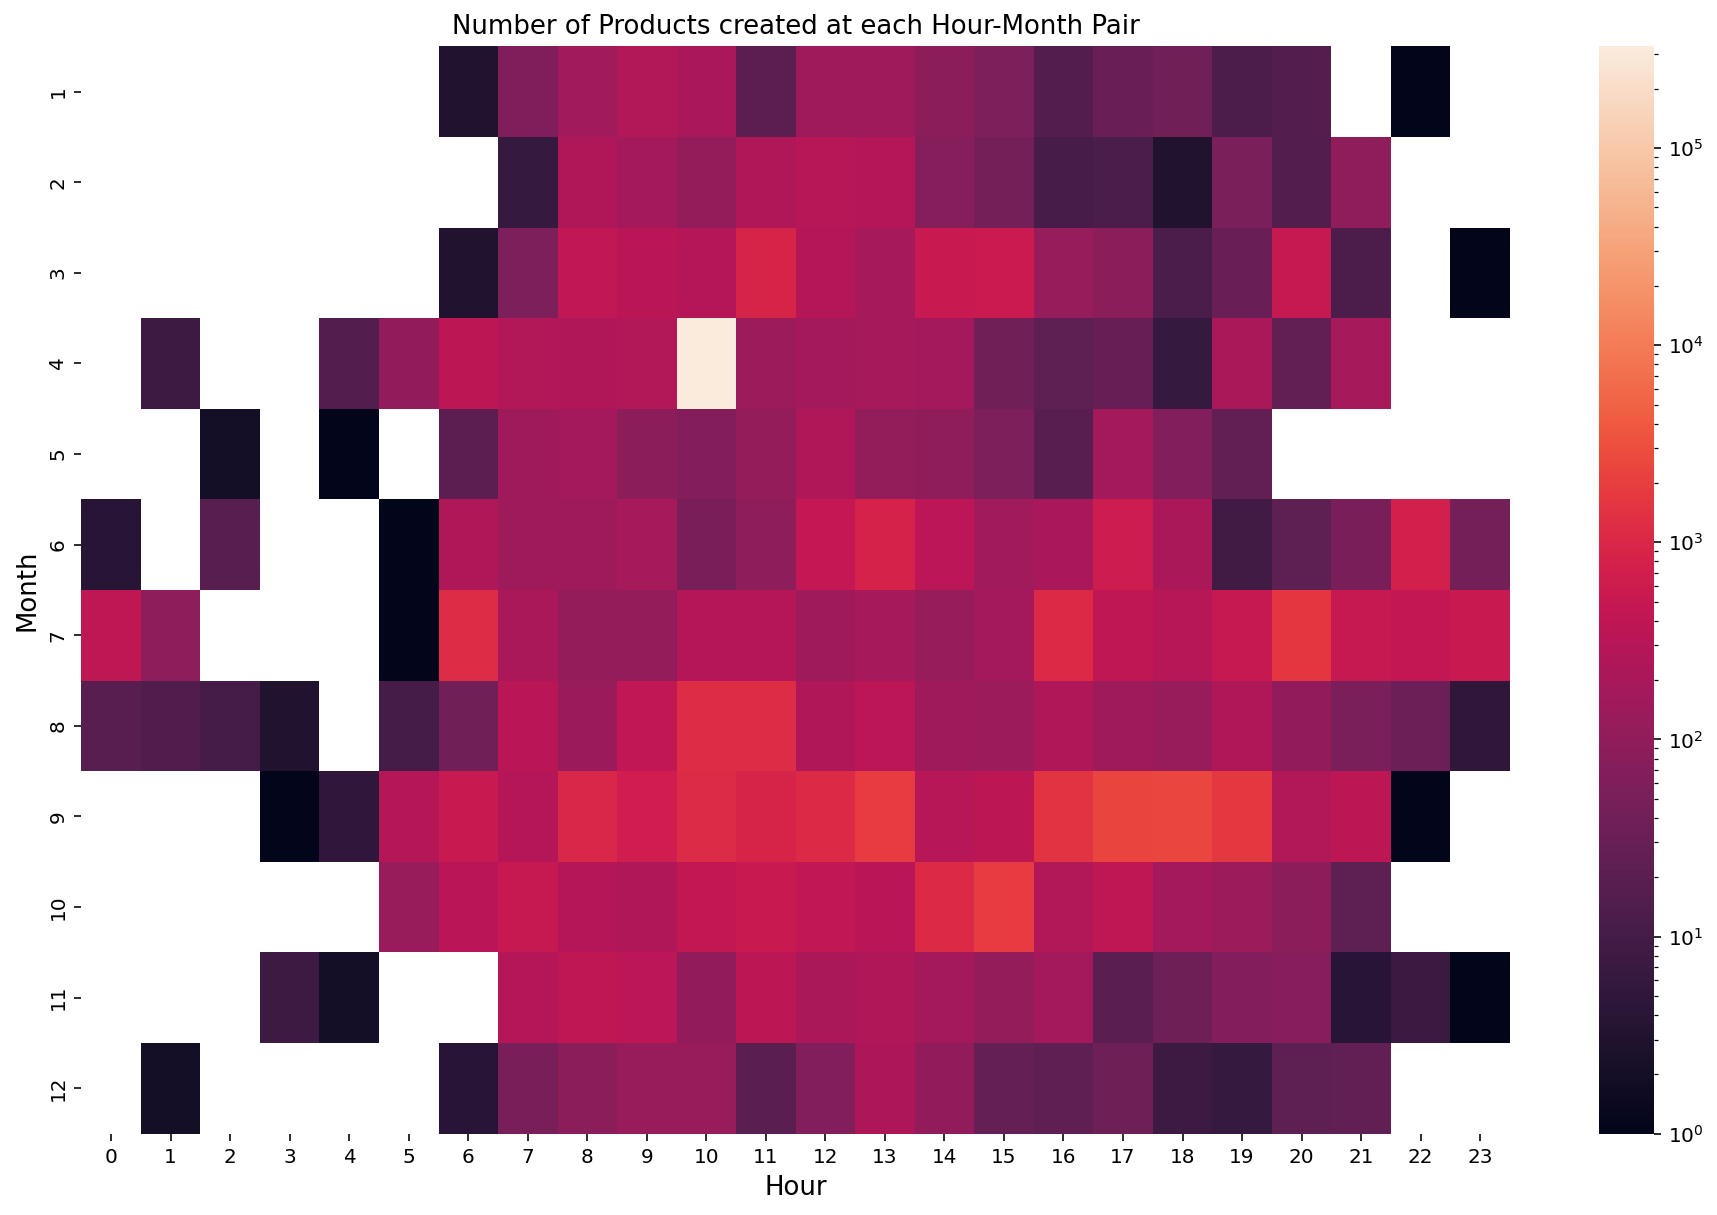

In [42]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(16,10))
sns.heatmap(created_heatmap, norm=LogNorm())
plt.title('Number of Products created at each Hour-Month Pair', fontsize = 13)
plt.ylabel('Month', fontsize = 13)
plt.xlabel('Hour', fontsize = 13)
plt.show()

#### **2. Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (e.g., in yyyy-mm format) on the ```x-axis``` and the total number of items created during each month on the ```y-axis```. Each bar in the plot should stack the number of items created by each country each month. Please make sure all bars are visible by choosing the appropriate scale for the ```y-axis```.**

- To ease our task, we create a new column that will only contain the year and month as a date for each of our observation :

In [43]:
df_openfood["year-month"] = df_openfood["created_at"].dt.strftime("%Y %m")

- Next, we subset our dataframe to only contain the observations regarding CH, DE, FR, IT and the US and then we create our plot :

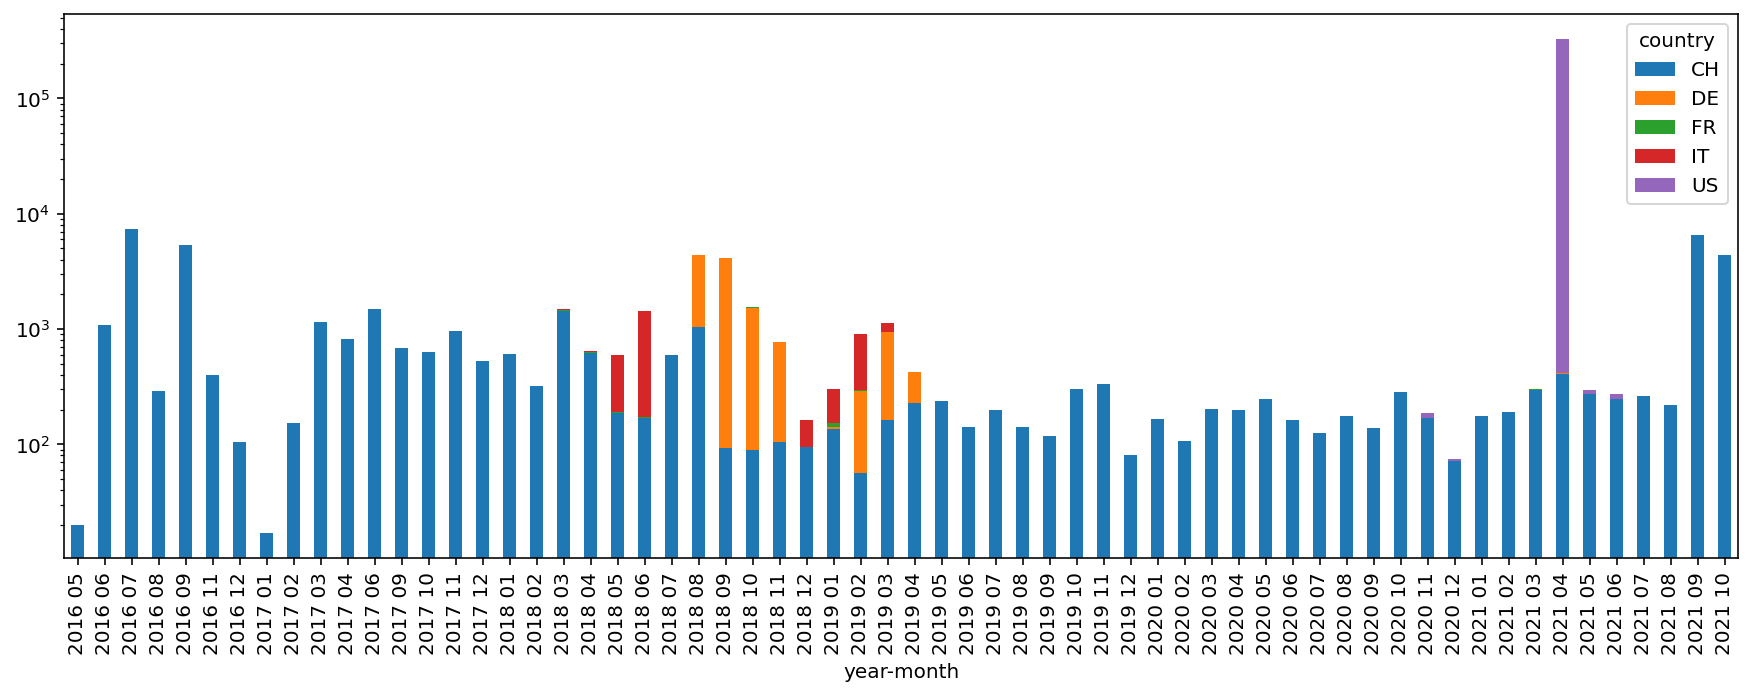

In [44]:
df_selected_countries = df_openfood[df_openfood["country"].isin(["CH", "DE", "FR", "IT", "US"])]

pd.crosstab(df_selected_countries["year-month"], df_selected_countries["country"]).plot(
    kind='bar',stacked=True, log=True,figsize=(15,5),legend=True);